# Alex Jupyter notebook Tensorflow

    A Jupyter learning notes for tensorflow 
    June ,2017
    Alex Feng
    alfeng@cisco.com
    
    Jupyter_path = /Users/AlexFeng/Library/Python/2.7/bin/jupyter notebook
    
[Tensorflow official web](http://www.tensorflow.org)
    
For Github , please refer [Alex Github Tensorflow link][rf1]
    
   [rf1]:<https://github.com/AlexFengCisco/Tensorflow/blob/master/Jupyter_note/Tensorflow_note.ipynb>

### Import modules

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import animation
from numpy.random import RandomState

### Linear matplot

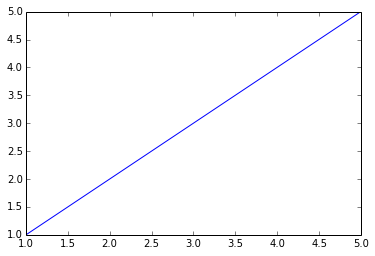

In [14]:
plt.plot([1,2,3,4,5],[1,2,3,4,5])

### Add picture link in Jupyter notebook page

In [15]:
from IPython.display import Image
from IPython.core.display import HTML

Image(url="https://lh3.googleusercontent.com/hIViPosdbSGUpLmPnP2WqL9EmvoVOXW7dy6nztmY5NZ9_u5lumMz4sQjjsBZ2QxjyZZCIPgucD2rhdL5uR7K0vLi09CEJYY=s688")

### Add local picture with markdown

![title](sin.png)

### Tensorflow get_default_graph()

In [8]:
a = tf.constant([1.0,2.0],name='a')
b = tf.constant([2.0,3.0],name='b')
print(tf.get_default_graph())
print(a.graph is tf.get_default_graph())

print a

True
Tensor("a_1:0", shape=(2,), dtype=float32)


### Matplot nonlinear 

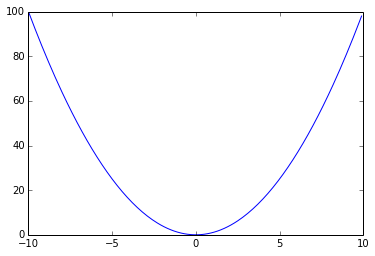

In [5]:
i=0
ii=-10
x =[]
y =[]
for i in range(200):
    x.append(ii)
    y.append(ii*ii)
    ii=ii+0.1
%matplotlib inline 
# for interactive python mode ,ie ipython in Jupyter notebook
plt.plot(x,y)  

### Tensorflow avtivation function matplot

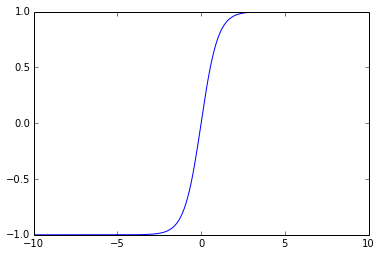

In [7]:
X=tf.constant(x,dtype=tf.float32)
sess=tf.Session()
Y=sess.run(tf.tanh(X)) 
# activation function  tf.nn.relu()  tf.sigmoid()  tf.tanh()

%matplotlib inline
plt.plot(x,Y) 

### Tensorflow queue


>create a queue , init FIFO queue with digits , and first out the queue , plus the digit and push into the queue tail , then do it twice ...


In [10]:
q = tf.FIFOQueue(3,"float")
init = q.enqueue_many(([0.1,0.2,0.3],))
x = q.dequeue()
y = x+1
q_inc = q.enqueue([y])

with tf.Session() as sess:
    sess.run(init)
    quelen = sess.run(q.size())
    for i in range(2):
        sess.run(q_inc)
        
    quelen = sess.run(q.size())
    for i in range(quelen):
        print (sess.run(q.dequeue()))
        

0.3
1.1
1.2


>The follwoing demostrate tf.Variable tf.random_normal with seed

In [13]:
a = tf.random_uniform([1]) # no seed
b = tf.random_normal([1])

print("Session 1")
with tf.Session() as sess1:
  print(sess1.run(a))  # generates 'A1'
  print(sess1.run(a))  # generates 'A2'
  print(sess1.run(b))  # generates 'B1'
  print(sess1.run(b))  # generates 'B2'

print("Session 2")
with tf.Session() as sess2:
  print(sess2.run(a))  # generates 'A3'
  print(sess2.run(a))  # generates 'A4'
  print(sess2.run(b))  # generates 'B3'
  print(sess2.run(b))  # generates 'B4'

Session 1
[ 0.93651235]
[ 0.72354221]
[-0.98065913]
[-1.60730386]
Session 2
[ 0.38616145]
[ 0.09960794]
[-1.09278762]
[-1.12372315]


In [14]:
a = tf.random_uniform([2,3], seed=1)
b = tf.random_normal([1])

# Repeatedly running this block with the same graph will generate the same
# sequence of values for 'a', but different sequences of values for 'b'.
print("Session 1")
with tf.Session() as sess1:
  print(sess1.run(a))  # generates 'A1'
  print(sess1.run(a))  # generates 'A2'
  print(sess1.run(b))  # generates 'B1'
  print(sess1.run(b))  # generates 'B2'

print("Session 2")
with tf.Session() as sess2:
  print(sess2.run(a))  # generates 'A1'
  print(sess2.run(a))  # generates 'A2'
  print(sess2.run(b))  # generates 'B3'
  print(sess2.run(b))  # generates 'B4'

Session 1
[[ 0.23903739  0.92039955  0.05051243]
 [ 0.49574447  0.83552229  0.02647042]]
[[ 0.76375294  0.81383967  0.45532501]
 [ 0.04126346  0.71633077  0.72387242]]
[-1.06889081]
[-1.30729699]
Session 2
[[ 0.23903739  0.92039955  0.05051243]
 [ 0.49574447  0.83552229  0.02647042]]
[[ 0.76375294  0.81383967  0.45532501]
 [ 0.04126346  0.71633077  0.72387242]]
[ 0.45696697]
[ 0.93150395]


In [88]:
BATCH_SIZE = 800
STEPS = 10000

w1=tf.Variable(tf.random_normal([2,3],stddev=1,seed=1))
w2=tf.Variable(tf.random_normal([3,1],stddev=1,seed=1))

x=tf.placeholder(tf.float32, shape=(None,2), name="x-input")
y_=tf.placeholder(tf.float32, shape=(None,1), name="y-input")


test_data=[[0.3,0.1],[0.4,0.1],[0.8,0.6],[0.7,0.8]]


#define neural network forward propagation
a=tf.nn.relu(tf.matmul(x,w1))
y=tf.nn.relu(tf.matmul(a,w2))

#define loss and backward propagation 
cross_entropy = -tf.reduce_mean(y_*tf.log(tf.clip_by_value(y,1e-10,1.0)))
#cross_entropy = tf.reduce_mean(tf.reduce_sum(tf.square(y-y_),reduction_indices=[1]))

train_step = tf.train.AdamOptimizer(0.0003).minimize(cross_entropy)
#train_step = tf.train.GradientDescentOptimizer(0.003).minimize(cross_entropy)
rdm=RandomState(1)
dataset_size=12800
X=rdm.rand(dataset_size,2)

Y = [[int(x1+x2<1)] for (x1,x2) in X]


with tf.Session() as sess:
    
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    print("training  sample X")
    print(X)
    print("training lable Y")
    print(Y)
    print("====BEFORE TRAINING W1 W2")
    print(sess.run(w1))
    print(sess.run(w2))
    
    for i in range(STEPS+1):

        start=(i*BATCH_SIZE)%dataset_size
        end=min(start+BATCH_SIZE,dataset_size)
        
        sess.run(train_step,feed_dict={x:X[start:end],y_:Y[start:end]})
        
        if i % 1000 == 0:
            total_cross_entropy = sess.run(cross_entropy,feed_dict={x:X,y_:Y})
            print("After %d training steps , cross entropy on all data is %g" %(i,total_cross_entropy))
    

    print("===AFTER TRAINING W1 W2")    
    print(sess.run(w1))
    print(sess.run(w2))
    
    
    saver=tf.train.Saver()
    saver.save(sess,"model.ckpt")
    print"====PREDICT"
    
    print(sess.run(y,feed_dict={x:test_data}))
   

training  sample X
[[  4.17022005e-01   7.20324493e-01]
 [  1.14374817e-04   3.02332573e-01]
 [  1.46755891e-01   9.23385948e-02]
 ..., 
 [  8.95640966e-01   9.95092184e-01]
 [  5.08795775e-01   7.86913512e-01]
 [  6.50519285e-01   1.31239960e-01]]
training lable Y
[[0], [1], [1], [1], [1], [0], [0], [1], [1], [1], [0], [0], [0], [1], [0], [1], [0], [0], [0], [1], [0], [0], [1], [0], [1], [1], [1], [1], [1], [0], [1], [0], [1], [0], [0], [0], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [0], [1], [0], [1], [0], [1], [1], [1], [0], [0], [1], [0], [1], [0], [0], [0], [1], [1], [1], [1], [1], [0], [1], [1], [1], [0], [1], [0], [1], [1], [0], [0], [1], [0], [1], [1], [1], [1], [0], [1], [0], [1], [0], [0], [1], [0], [0], [0], [1], [0], [0], [0], [1], [1], [1], [1], [1], [1], [0], [0], [0], [0], [0], [0], [1], [0], [0], [1], [0], [1], [0], [1], [0], [0], [0], [1], [0], [0], [0], [0], [1], [1], [0], [0], [1], [0], [0], [1], [0], [0], [0], [0], [0]

[[-0.81131822  1.48459876  0.06532937]
 [-2.44270396  0.0992484   0.59122431]]
[[-0.81131822]
 [ 1.48459876]
 [ 0.06532937]]
After 0 training steps , cross entropy on all data is 0.287892
After 1000 training steps , cross entropy on all data is 0.093544
After 2000 training steps , cross entropy on all data is 0.0467108
After 3000 training steps , cross entropy on all data is 0.0294574
After 4000 training steps , cross entropy on all data is 0.0197048
After 5000 training steps , cross entropy on all data is 0.0135756
After 6000 training steps , cross entropy on all data is 0.009487
After 7000 training steps , cross entropy on all data is 0.00682429
After 8000 training steps , cross entropy on all data is 0.00498164
After 9000 training steps , cross entropy on all data is 0.0036696
After 10000 training steps , cross entropy on all data is 0.00277887
===AFTER TRAINING W1 W2
[[-0.81131822  2.75265813  2.06231666]
 [-2.44270396  1.11795187  2.34801531]]
[[-0.81131822]
 [ 2.85262728]
 [ 1.49

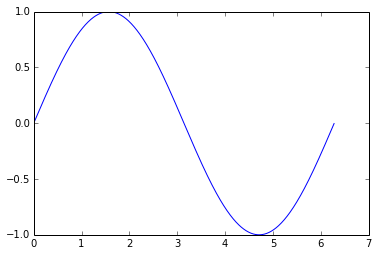

In [90]:
#fig,ax=plt.subpolts()

x = np.arange(0,2*np.pi,0.01)
y = np.sin(x)
%matplotlib inline
plt.plot(x,y)